<a href="https://colab.research.google.com/github/stephenliu713/python_data-analysis/blob/main/06_pandas_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

所需数据：`data/dogs.csv`, `data/invest.csv`, `steps.csv`

# 1. 多维数据的处理

许多时候**我们需要从多个维度（即多个角度）对数据进行观察和分析**。

举例来说，一个足球运动员身上可能有多个标签：姓名、所属俱乐部、场上位置……我们希望能够从各个维度来分析这些数据。


In [ ]:
football = {'team' : ['Man City', 'Man City', 'Man City', 'Man City', 'Chelsea', 'Chelsea'], 
          'player' : ['Walker', 'Stones', 'Foden', 'Jesus', 'Cahill', 'Pedro'],
          'pos' : ['D', 'D', 'M', 'F', 'D', 'F'],
          'goals' : [1, 0, 0, 1, 0, 3],
          'assists': [0,0,0,0,0,0]
         }

df_ft = pd.DataFrame(football)
df_ft


,team,player,pos,goals,assists
0,Man City,Walker,D,1,0
1,Man City,Stones,D,0,0
2,Man City,Foden,M,0,0
3,Man City,Jesus,F,1,0
4,Chelsea,Cahill,D,0,0
5,Chelsea,Pedro,F,3,0


## 1.1 创建多重索引 multi-index `df.set_index([idx1,idx2,...])`

为了方便分析，pandas允许对数据设定多个索引列。

In [ ]:
df_ft_1 = df_ft.set_index(['team','pos'])
df_ft_1

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0
         M     Foden      0        0
         F     Jesus      1        0
Chelsea  D    Cahill      0        0
         F     Pedro      3        0

In [ ]:
df_ft_1.index

MultiIndex([('Man City', 'D'),
            ('Man City', 'D'),
            ('Man City', 'M'),
            ('Man City', 'F'),
            ( 'Chelsea', 'D'),
            ( 'Chelsea', 'F')],
           names=['team', 'pos'])

## 1.2 查找多重索引 `df.loc[(col1,col2,...),:]`

In [ ]:
# 查找曼城队(Man City)所有的后卫(D)
df_ft_1.loc[('Man City', 'D'),:]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0

## 1.3 对多重索引排序 `df.sort_index(axis)`

刚才的运行返回了`PerformanceWarning`,这代表着相关的程序逻辑可能影响性能。**这是因为存在多重索引时，我们所查找的索引列没有经过排序。**在数据量巨大时，这可能会影响程序运行的时间。

因此，我们不妨先为索引列排序。

In [ ]:
df_ft_1.sort_index(axis=0)

player  goals  assists
team     pos                        
Chelsea  D    Cahill      0        0
         F     Pedro      3        0
Man City D    Walker      1        0
         D    Stones      0        0
         F     Jesus      1        0
         M     Foden      0        0

## 1.4 部分索引 partial indexing `df.xs(key, level=None)`

用`df.xs()`对某一个index进行索引 → 部分索引


*   `key`: 目标index
*   `level`: 索引范围（`int`或`str`）



In [ ]:
# 查询所有切尔西（Chelsea）球员
df_ft_1.xs('Chelsea',
           level = 0)

,player,goals,assists
pos,,,
D,Cahill,0,0
F,Pedro,3,0


In [ ]:
# 查询所有曼城（Man City）球员
df_ft_1.xs('Man City',
           level = 'team')

,player,goals,assists
pos,,,
D,Walker,1,0
D,Stones,0,0
M,Foden,0,0
F,Jesus,1,0


### 1.5 多重索引的初始化 `df.reset_index()`

如果你之前没有保留原始`df`（即设置`inplace=True`）（不建议这么做），那么你仍然可以通过`df.reset_index()`很容易的初始化index。

In [ ]:
df_ft_re = df_ft_1.reset_index()
df_ft_re

,team,pos,player,goals,assists
0,Man City,D,Walker,1,0
1,Man City,D,Stones,0,0
2,Man City,M,Foden,0,0
3,Man City,F,Jesus,1,0
4,Chelsea,D,Cahill,0,0
5,Chelsea,F,Pedro,3,0


## 1.6 `df`的转置 `df.transpose()`

你可以像转置矩阵一样转置`df`,也会对应的转置它们的index。这种做法在某些场景中可能效率更高。


In [ ]:
# 设置'team','pos','player'为索引
df_ft_2 = df_ft.set_index(['team','pos','player'])
df_ft_2

goals  assists
team     pos player                
Man City D   Walker      1        0
             Stones      0        0
         M   Foden       0        0
         F   Jesus       1        0
Chelsea  D   Cahill      0        0
         F   Pedro       3        0

In [ ]:
# df的转置
df_ft_2t = df_ft_2.transpose()
df_ft_2t

team    Man City                    Chelsea      
pos            D            M     F       D     F
player    Walker Stones Foden Jesus  Cahill Pedro
goals          1      0     0     1       0     3
assists        0      0     0     0       0     0

In [ ]:
df_ft_2t.loc['goals', ('Man City', 'D', 'Stones')]

0

# 2. 面板数据 panel-data 

面板数据至少包含三个维度。

In [ ]:
df_dogs = pd.read_csv('data/dogs.csv')
df_dogs

,dog,var,time,value
0,Buster,walks,10/1/2018,2
1,Buster,walks,10/2/2018,2
2,Buster,snacks,10/1/2018,4
3,Buster,snacks,10/2/2018,3
4,Buster,snacks,10/3/2018,4
5,Buster,snacks,10/4/2018,5
6,Su,walks,10/1/2018,2
7,Su,walks,10/2/2018,2
8,Su,walks,10/3/2018,2
9,Su,snacks,10/1/2018,3


In [ ]:
df_dogs.dtypes

dog      object
var      object
time     object
value     int64
dtype: object

In [ ]:
# 设置multi-index
df_dogs_1 = df_dogs.set_index(['dog','time','var'])
df_dogs_1.sort_index(inplace=True)
df_dogs_1

value
dog    time      var          
Buster 10/1/2018 snacks      4
                 walks       2
       10/2/2018 snacks      3
                 walks       2
       10/3/2018 snacks      4
       10/4/2018 snacks      5
                 walks       2
       10/5/2018 snacks      4
                 walks       3
       10/6/2018 snacks      3
                 walks       1
       10/7/2018 snacks      2
                 walks       3
Jax    10/4/2018 snacks      5
                 walks       3
       10/5/2018 snacks      5
                 walks       2
       10/6/2018 snacks      5
                 walks       2
       10/7/2018 snacks      7
                 walks       3
Su     10/1/2018 snacks      3
                 walks       2
       10/2/2018 snacks      4
                 walks       2
       10/3/2018 snacks      4
                 walks       2
       10/4/2018 snacks      3
                 walks       3
       10/5/2018 snacks      3
                 walks       2
       10/6/2018 snacks      4
                 walks       4
       10/7/2018 snacks      2
                 walks       1

## 2.1 拆堆栈 unstack `df.unstack(col)`


In [ ]:
df_dogs_2 = df_dogs_1.unstack('var')
df_dogs_2

value      
var              snacks walks
dog    time                  
Buster 10/1/2018    4.0   2.0
       10/2/2018    3.0   2.0
       10/3/2018    4.0   NaN
       10/4/2018    5.0   2.0
       10/5/2018    4.0   3.0
       10/6/2018    3.0   1.0
       10/7/2018    2.0   3.0
Jax    10/4/2018    5.0   3.0
       10/5/2018    5.0   2.0
       10/6/2018    5.0   2.0
       10/7/2018    7.0   3.0
Su     10/1/2018    3.0   2.0
       10/2/2018    4.0   2.0
       10/3/2018    4.0   2.0
       10/4/2018    3.0   3.0
       10/5/2018    3.0   2.0
       10/6/2018    4.0   4.0
       10/7/2018    2.0   1.0

In [ ]:
# 拆完堆栈以后是一个多重索引
df_dogs_2.columns

MultiIndex([('value', 'snacks'),
            ('value',  'walks')],
           names=[None, 'var'])

In [ ]:
# 你可以同时unstack多个变量
df_dogs_1.unstack(['dog','var'])

value                                
dog       Buster          Jax           Su      
var       snacks walks snacks walks snacks walks
time                                            
10/1/2018    4.0   2.0    NaN   NaN    3.0   2.0
10/2/2018    3.0   2.0    NaN   NaN    4.0   2.0
10/3/2018    4.0   NaN    NaN   NaN    4.0   2.0
10/4/2018    5.0   2.0    5.0   3.0    3.0   3.0
10/5/2018    4.0   3.0    5.0   2.0    3.0   2.0
10/6/2018    3.0   1.0    5.0   2.0    4.0   4.0
10/7/2018    2.0   3.0    7.0   3.0    2.0   1.0

### 2.1.1 数据降维


In [ ]:
df_dogs_2.columns = df_dogs_2.columns.droplevel(level=0)
df_dogs_2

var               snacks  walks
dog    time                    
Buster 10/1/2018     4.0    2.0
       10/2/2018     3.0    2.0
       10/3/2018     4.0    NaN
       10/4/2018     5.0    2.0
       10/5/2018     4.0    3.0
       10/6/2018     3.0    1.0
       10/7/2018     2.0    3.0
Jax    10/4/2018     5.0    3.0
       10/5/2018     5.0    2.0
       10/6/2018     5.0    2.0
       10/7/2018     7.0    3.0
Su     10/1/2018     3.0    2.0
       10/2/2018     4.0    2.0
       10/3/2018     4.0    2.0
       10/4/2018     3.0    3.0
       10/5/2018     3.0    2.0
       10/6/2018     4.0    4.0
       10/7/2018     2.0    1.0

### 2.1.2 添加新变量

In [ ]:
df_dogs_2['ws_ratio'] = df_dogs_2['walks'] / df_dogs_2['snacks']
df_dogs_2.head()

var               snacks  walks  ws_ratio
dog    time                              
Buster 10/1/2018     4.0    2.0  0.500000
       10/2/2018     3.0    2.0  0.666667
       10/3/2018     4.0    NaN       NaN
       10/4/2018     5.0    2.0  0.400000
       10/5/2018     4.0    3.0  0.750000

### 2.1.3 多维数据可视化

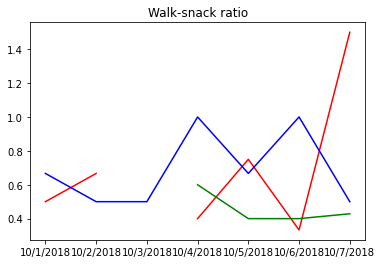

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_dogs_2.loc['Buster'].index,
        df_dogs_2.loc['Buster','ws_ratio'],
        color = 'red',
        label = 'Buster')

ax.plot(df_dogs_2.loc['Su'].index,
        df_dogs_2.loc['Su','ws_ratio'],
        color = 'blue',
        label = 'Su')

ax.plot(df_dogs_2.loc['Jax'].index,
        df_dogs_2.loc['Jax','ws_ratio'],
        color = 'green',
        label = 'Jax')

ax.set_title('Walk-snack ratio')

plt.show()

## 2.2 建堆栈 stack `df.stack()`

In [ ]:
df_dogs_3 = df_dogs_2.stack()
df_dogs_3

dog     time       var     
Buster  10/1/2018  snacks      4.000000
                   walks       2.000000
                   ws_ratio    0.500000
        10/2/2018  snacks      3.000000
                   walks       2.000000
                   ws_ratio    0.666667
        10/3/2018  snacks      4.000000
        10/4/2018  snacks      5.000000
                   walks       2.000000
                   ws_ratio    0.400000
        10/5/2018  snacks      4.000000
                   walks       3.000000
                   ws_ratio    0.750000
        10/6/2018  snacks      3.000000
                   walks       1.000000
                   ws_ratio    0.333333
        10/7/2018  snacks      2.000000
                   walks       3.000000
                   ws_ratio    1.500000
Jax     10/4/2018  snacks      5.000000
                   walks       3.000000
                   ws_ratio    0.600000
        10/5/2018  snacks      5.000000
                   walks       2.000000
            

In [ ]:
type(df_dogs_3)

pandas.core.series.Series

`df.stack()` → 只有一列数据，其余全是index。

In [ ]:
# 数据的还原
df_dogs_4 = df_dogs_3.reset_index()
df_dogs_4

,dog,time,var,0
0,Buster,10/1/2018,snacks,4.000000
1,Buster,10/1/2018,walks,2.000000
2,Buster,10/1/2018,ws_ratio,0.500000
3,Buster,10/2/2018,snacks,3.000000
4,Buster,10/2/2018,walks,2.000000
5,Buster,10/2/2018,ws_ratio,0.666667
6,Buster,10/3/2018,snacks,4.000000
7,Buster,10/4/2018,snacks,5.000000
8,Buster,10/4/2018,walks,2.000000
9,Buster,10/4/2018,ws_ratio,0.400000


# 3. 数据分组


In [ ]:
df_dogs.head()

,dog,var,time,value
0,Buster,walks,10/1/2018,2
1,Buster,walks,10/2/2018,2
2,Buster,snacks,10/1/2018,4
3,Buster,snacks,10/2/2018,3
4,Buster,snacks,10/3/2018,4


## 3.1 `df.groupby()`
返回值是一种特殊的数据类型`DataFrameGroupBy`

In [ ]:
df_dogs_gr = df_dogs.groupby('dog')
df_dogs_gr

In [ ]:
type(df_dogs_gr)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
df_dogs_gr2 = df_dogs.groupby('var')

## 3.2 分组计算

In [ ]:
df_dogs_gr.mean()

,value
dog,
Buster,2.923077
Jax,4.000000
Su,2.785714


In [ ]:
df_dogs_gr2.mean()

,value
var,
snacks,3.888889
walks,2.294118


# 4. 数据清洗 data cleaning 

现实世界中的很多数据都是“脏”的，即它们没有按照规范录入数据。比如`data/invest.csv`:开头有不需要的行，空数据也不是以`NaN`显示。

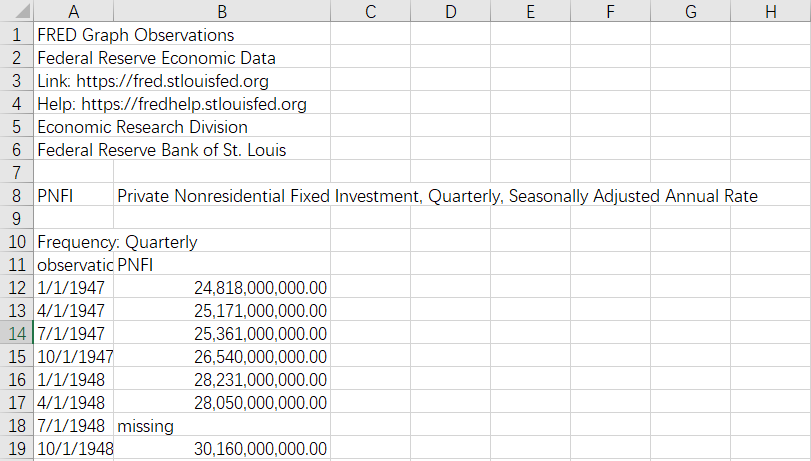

In [ ]:
df_inv_0 = pd.read_csv('data/invests.csv')
df_inv_0.head(20)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
5,NaN,NaN
6,PNFI,"Private Nonresidential Fixed Investment, Quart..."
7,NaN,NaN
8,Frequency: Quarterly,NaN
9,observation_date,PNFI


## 4.1 读取过程中清洗 `pd.read_csv(skiprows, thousands, na_values)`

In [ ]:
df_inv = pd.read_csv('data/invests.csv',
                     skiprows = 10,
                     thousands = ',',
                     na_values = 'missing')
df_inv.head(15)

,observation_date,PNFI
0,1/1/1947,2.481800e+10
1,4/1/1947,2.517100e+10
2,7/1/1947,2.536100e+10
3,10/1/1947,2.654000e+10
4,1/1/1948,2.823100e+10
5,4/1/1948,2.805000e+10
6,7/1/1948,NaN
7,10/1/1948,3.016000e+10
8,1/1/1949,2.858300e+10
9,4/1/1949,2.747600e+10


## 4.2 数据替换 `df.replace()`  

In [ ]:
df_dogs.sample(5)

,dog,var,time,value
30,Jax,snacks,10/5/2018,5
2,Buster,snacks,10/1/2018,4
19,Su,walks,10/5/2018,2
18,Buster,snacks,10/7/2018,2
28,Jax,walks,10/7/2018,3


In [ ]:
name_change = {'Buster': 'Baster',
               'Su': 'Susan',
               'Jax': 'Jay'}
df_dogs_6 = df_dogs.replace(name_change)
df_dogs_6.sample(5)

,dog,var,time,value
13,Baster,walks,10/5/2018,3
3,Baster,snacks,10/2/2018,3
7,Susan,walks,10/2/2018,2
32,Jay,snacks,10/7/2018,7
22,Susan,snacks,10/5/2018,3


## 4.3 筛选非重复值 `df[col].unique()`

*   只是显示变量，不是去重

*   只能筛选某一列的非重复值，不能筛选整个`df`的非重复值。



In [ ]:
df_dogs['dog'].unique()

array(['Buster', 'Su', 'Jax'], dtype=object)

## 4.4 对某一列应用函数 `df[col].map(func)`

In [ ]:
# 随意定义一个简单的运算函数改变value的值
def value_change(x):
  return 3*x+4

In [ ]:
df_dogs_6.head()

,dog,var,time,value
0,Baster,walks,10/1/2018,2
1,Baster,walks,10/2/2018,2
2,Baster,snacks,10/1/2018,4
3,Baster,snacks,10/2/2018,3
4,Baster,snacks,10/3/2018,4


In [ ]:
df_dogs_6['value_change'] = df_dogs_6['value'].map(value_change)
df_dogs_6.head()

,dog,var,time,value,value_change
0,Baster,walks,10/1/2018,2,10
1,Baster,walks,10/2/2018,2,10
2,Baster,snacks,10/1/2018,4,16
3,Baster,snacks,10/2/2018,3,13
4,Baster,snacks,10/3/2018,4,16


### 4.4.1 对整个或部分`df`应用函数 `df[[col1,col2,...]].applymap(func)`

In [ ]:
df_dogs_6[['value','value_change']].applymap(value_change).head()

,value,value_change
0,10,34
1,10,34
2,16,52
3,13,43
4,16,52


## 4.5 字符串处理

In [ ]:
df_movie = pd.read_csv('data/movies_merged.csv')
df_movie.sample(5)

,movieId,title,genres,userId,rating,timestamp
65432,5021,Murder by Death (1976),Comedy|Crime|Mystery|Thriller,387,3.0,1094877807
98494,126548,The DUFF (2015),Comedy,563,3.0,1441844933
34786,1704,Good Will Hunting (1997),Drama|Romance,98,4.0,1532457433
27343,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,267,5.0,959807517
37841,2001,Lethal Weapon 2 (1989),Action|Comedy|Crime|Drama,202,4.0,974921336


### 4.5.1 包含某个字符串 `str.contains(str)`

返回布尔类型的`Series`

正则式匹配

In [ ]:
s_comedy = df_movie['genres'].str.contains('Comedy')
s_comedy

0          True
1          True
2          True
3          True
4          True
          ...  
100831     True
100832     True
100833    False
100834    False
100835     True
Name: genres, Length: 100836, dtype: bool

In [ ]:
df_movie[s_comedy].sample(5)


,movieId,title,genres,userId,rating,timestamp
98592,128852,Chris Rock: Bigger & Blacker (1999),Comedy,89,4.5,1520409173
5399,186,Nine Months (1995),Comedy|Romance,55,0.5,1312747648
36592,1918,Lethal Weapon 4 (1998),Action|Comedy|Crime|Thriller,414,2.0,961439052
56373,3693,"Toxic Avenger, The (1985)",Comedy|Horror,19,2.0,965706728
75846,8360,Shrek 2 (2004),Adventure|Animation|Children|Comedy|Musical|Ro...,534,3.5,1459787998


### 4.5.2 字符串分割 `str.split()`

返回一个`list`

In [ ]:
df_movie['genres_split'] = df_movie['genres'].str.split('|')
df_movie.sample(3)

,movieId,title,genres,userId,rating,timestamp,genres_split
40775,2174,Beetlejuice (1988),Comedy|Fantasy,514,4.0,1533872559,"[Comedy, Fantasy]"
45192,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,391,5.0,1030826859,"[Action, Sci-Fi, Thriller]"
34960,1717,Scream 2 (1997),Comedy|Horror|Mystery|Thriller,380,2.0,1493667800,"[Comedy, Horror, Mystery, Thriller]"


### 4.5.3 字符串合并 `str.join()`


In [ ]:
df_movie['genres_join'] = df_movie['genres_split'].str.join('/')
df_movie.sample(3)

,movieId,title,genres,userId,rating,timestamp,genres_split,genres_join
97999,119145,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,341,4.0,1522174570,"[Action, Adventure, Comedy, Crime]",Action/Adventure/Comedy/Crime
49435,2918,Ferris Bueller's Day Off (1986),Comedy,527,4.0,1033174269,[Comedy],Comedy
70683,6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX,448,1.5,1206302799,"[Action, Adventure, Sci-Fi, Thriller, IMAX]",Action/Adventure/Sci-Fi/Thriller/IMAX


# 5. 数据合并 merging `pd.merge(left, right, left_on, right_on, how)`

`how`: *{'left', 'right', 'outer', 'inner', 'cross'}*

类似于Excel中的`VLOOKUP`

In [ ]:
df_dogs.sample(5)

,dog,var,time,value
5,Buster,snacks,10/4/2018,5
22,Su,snacks,10/5/2018,3
33,Jax,snacks,10/4/2018,5
16,Buster,snacks,10/5/2018,4
9,Su,snacks,10/1/2018,3


In [ ]:
df_dogs_7 = df_dogs.set_index(['dog','time','var'])
df_dogs_7 = df_dogs_7.unstack('var')
df_dogs_7.sample(5)

value      
var              snacks walks
dog    time                  
Su     10/2/2018    4.0   2.0
Buster 10/4/2018    5.0   2.0
       10/5/2018    4.0   3.0
Su     10/6/2018    4.0   4.0
       10/4/2018    3.0   3.0

In [ ]:
# 删除'value'
df_dogs_7 = df_dogs_7.droplevel(0, axis=1)
df_dogs_7.sample(5)

var               snacks  walks
dog    time                    
Buster 10/4/2018     5.0    2.0
       10/7/2018     2.0    3.0
Su     10/6/2018     4.0    4.0
Buster 10/3/2018     4.0    NaN
Su     10/7/2018     2.0    1.0

In [ ]:
df_steps = pd.read_csv('data/steps.csv')
df_steps.head()

,date,dog,steps
0,10/1/2018,Buster,503
1,10/2/2018,Buster,457
2,10/3/2018,Buster,299
3,10/4/2018,Buster,550
4,10/5/2018,Buster,476


## 5.1 `inner`

符合一般理解的匹配

In [ ]:
df_dogs_inner = pd.merge(left = df_dogs_7,
                         right = df_steps,
                         left_on = ['dog','time'],
                         right_on = ['dog', 'date'],
                         how = 'inner')
df_dogs_inner

,dog,snacks,walks,date,steps
0,Buster,4.0,2.0,10/1/2018,503
1,Buster,3.0,2.0,10/2/2018,457
2,Buster,4.0,NaN,10/3/2018,299
3,Buster,5.0,2.0,10/4/2018,550
4,Buster,4.0,3.0,10/5/2018,476
5,Buster,3.0,1.0,10/6/2018,377
6,Buster,2.0,3.0,10/7/2018,405
7,Jax,5.0,3.0,10/4/2018,465
8,Jax,5.0,2.0,10/5/2018,510
9,Jax,5.0,2.0,10/6/2018,563


## 5.2 `outer`

保留所有值

In [ ]:
df_dogs_outer = pd.merge(left = df_dogs_7,
                         right = df_steps,
                         left_on = ['dog','time'],
                         right_on = ['dog', 'date'],
                         how = 'outer')
df_dogs_outer

,dog,snacks,walks,date,steps
0,Buster,4.0,2.0,10/1/2018,503.0
1,Buster,3.0,2.0,10/2/2018,457.0
2,Buster,4.0,NaN,10/3/2018,299.0
3,Buster,5.0,2.0,10/4/2018,550.0
4,Buster,4.0,3.0,10/5/2018,476.0
5,Buster,3.0,1.0,10/6/2018,377.0
6,Buster,2.0,3.0,10/7/2018,405.0
7,Jax,5.0,3.0,10/4/2018,465.0
8,Jax,5.0,2.0,10/5/2018,510.0
9,Jax,5.0,2.0,10/6/2018,563.0


## 5.3 `left`

以`left`为准

In [ ]:
df_dogs_left = pd.merge(left = df_dogs_7,
                         right = df_steps,
                         left_on = ['dog','time'],
                         right_on = ['dog', 'date'],
                         how = 'left')
df_dogs_left

,dog,snacks,walks,date,steps
0,Buster,4.0,2.0,10/1/2018,503.0
1,Buster,3.0,2.0,10/2/2018,457.0
2,Buster,4.0,NaN,10/3/2018,299.0
3,Buster,5.0,2.0,10/4/2018,550.0
4,Buster,4.0,3.0,10/5/2018,476.0
5,Buster,3.0,1.0,10/6/2018,377.0
6,Buster,2.0,3.0,10/7/2018,405.0
7,Jax,5.0,3.0,10/4/2018,465.0
8,Jax,5.0,2.0,10/5/2018,510.0
9,Jax,5.0,2.0,10/6/2018,563.0


## 5.4 `right`

与`left`相反

In [ ]:
df_dogs_right = pd.merge(left = df_dogs_7,
                         right = df_steps,
                         left_on = ['dog','time'],
                         right_on = ['dog', 'date'],
                         how = 'right')
df_dogs_right

,dog,snacks,walks,date,steps
0,Buster,4.0,2.0,10/1/2018,503
1,Buster,3.0,2.0,10/2/2018,457
2,Buster,4.0,NaN,10/3/2018,299
3,Buster,5.0,2.0,10/4/2018,550
4,Buster,4.0,3.0,10/5/2018,476
5,Buster,3.0,1.0,10/6/2018,377
6,Buster,2.0,3.0,10/7/2018,405
7,Buster,NaN,NaN,10/8/2018,425
8,Buster,NaN,NaN,10/9/2018,512
9,Su,3.0,2.0,10/1/2018,499
